In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
shootings_df = pd.read_csv('fatal-police-shootings-data.csv')

population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
population_df = population[0]

states = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', 
                      header=0, skiprows=[0,1,2,3,4,5,6,7,8,10])

states_df = states[0]

### Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [3]:
races = {'A': 'Asian', 'W': 'White', 'H': 'Hispanic', 'B':'Black', 
         'O': 'Other', 'nan': 'unknown', 'N': 'Native American'}
# according to: https://github.com/washingtonpost/data-police-shootings

shootings_df['race'] = shootings_df['race'].replace(races).fillna('unknown')

shtngs_pivot = shootings_df.pivot_table(values='id', index='race', 
                                        columns='signs_of_mental_illness', 
                                        aggfunc='count', margins=True)

shtngs_pivot

signs_of_mental_illness,False,True,All
race,,,
Asian,69,24,93
Black,1114,184,1298
Hispanic,745,157,902
Native American,64,14,78
Other,37,11,48
White,1763,713,2476
unknown,408,113,521
All,4200,1216,5416


### Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [4]:
shtngs_pivot.reset_index()
shtngs_pivot['mnt_ill_rate'] = shtngs_pivot.apply(lambda row: row[True] / row['All'] * 100, axis=1).round(2)
shtngs_pivot

signs_of_mental_illness,False,True,All,mnt_ill_rate
race,,,,
Asian,69,24,93,25.81
Black,1114,184,1298,14.18
Hispanic,745,157,902,17.41
Native American,64,14,78,17.95
Other,37,11,48,22.92
White,1763,713,2476,28.80
unknown,408,113,521,21.69
All,4200,1216,5416,22.45


#### Największy odsetek ofiar interwencji, wykazujących oznaki choroby psychicznej jest wśród ofiar rasy białej

### Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [5]:
shootings_df['date'] = pd.to_datetime(shootings_df['date'])
shootings_df['weekday'] = shootings_df['date'].dt.day_name()
shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Sunday


<AxesSubplot:>

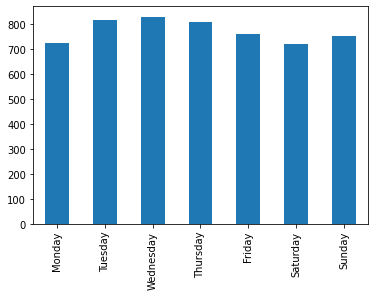

In [6]:
shootings_df['weekday'] = pd.Categorical(shootings_df['weekday'], categories=
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True)

sht_per_wday = shootings_df['weekday'].value_counts()
sht_per_wday = sht_per_wday.sort_index()

sht_per_wday.plot.bar()

### Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [7]:
shootings_df = shootings_df.merge(states_df[['Name and status of region', 'ANSI']], 
                                  left_on='state', right_on='ANSI').drop(columns='ANSI')

shootings_df = shootings_df.merge(population_df[['Population estimate, July 1, 2019[2]', 'State']], 
                                  left_on='Name and status of region', right_on='State').drop(columns='State')

shootings_df.rename(columns={'Population estimate, July 1, 2019[2]': 'population', 
                             'Name and status of region': 'state_name'}, inplace=True)

shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday,state_name,population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington,7614893
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,Hispanic,Pasco,WA,True,other,Foot,False,Tuesday,Washington,7614893
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,White,Sumas,WA,True,attack,Not fleeing,False,Thursday,Washington,7614893
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,Native American,Lakewood,WA,True,other,Foot,False,Tuesday,Washington,7614893
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,White,Kennewick,WA,True,attack,Not fleeing,False,Monday,Washington,7614893


In [8]:
sht_per_tsd_df = shootings_df.pivot_table(values='population', 
                                          index='state_name', 
                                          aggfunc=['count', 'mean']).reset_index()

sht_per_tsd_df = sht_per_tsd_df.droplevel(1, axis=1)
sht_per_tsd_df.rename(columns={'count': 'cases', 'mean': 'citizens'}, inplace=True)

sht_per_tsd_df['cases/1000_cit'] = sht_per_tsd_df.apply(lambda row: row['cases'] / (row['citizens']*0.001), axis=1).round(3)

sht_per_tsd_df

,state_name,cases,citizens,cases/1000_cit
0,Alabama,104,4903185,0.021
1,Alaska,39,731545,0.053
2,Arizona,254,7278717,0.035
3,Arkansas,83,3017825,0.028
4,California,799,39512223,0.020
5,Colorado,195,5758736,0.034
6,Connecticut,21,3565287,0.006
7,Delaware,13,973764,0.013
8,District of Columbia,13,705749,0.018
9,Florida,350,21477737,0.016
